In [4]:
# Gates code for FP 

## Textmining Naive Bayes Example
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


import codecs
from sklearn import feature_extraction

#Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer but with tf-idf norm
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import os.path

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [14]:
"""from google.colab import files
uploaded = files.upload()"""
df = pd.read_csv("https://drive.google.com/open?id=16D3BuADCUaMvVLadZMjohAaUahbTV24J")

ParserError: Error tokenizing data. C error: Expected 275 fields in line 131, saw 409


In [8]:
df =  pd.read_csv("C:/Users/aivii/programsmm/FP736/corpus/combined_csv1.csv")
print(df.head)
df = df.drop(df.columns[[0]], axis=1) # remove the first column 
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  label                                            reviews
0               0      1  I went and saw this movie last night after bei...
1               1      1  Actor turned director Bill Paxton follows up h...
2               2      1  As a recreational golfer with some knowledge o...
3               3      1  I saw this film in a sneak preview, and it is ...
4               4      1  Bill Paxton has taken the true story of the 19...
...           ...    ...                                                ...
49995       24995      0  Towards the end of the movie, I felt it was to...
49996       24996      0  This is the kind of movie that my enemies cont...
49997       24997      0  I saw 'Descent' last night at the Stockholm Fi...
49998       24998      0  Some films that you pick up for a pound turn o...
49999       24999      0  This is one of the dumbest films, I've ever se...

[50000 rows x 3 columns]>
<bound method NDFrame.head of  

C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


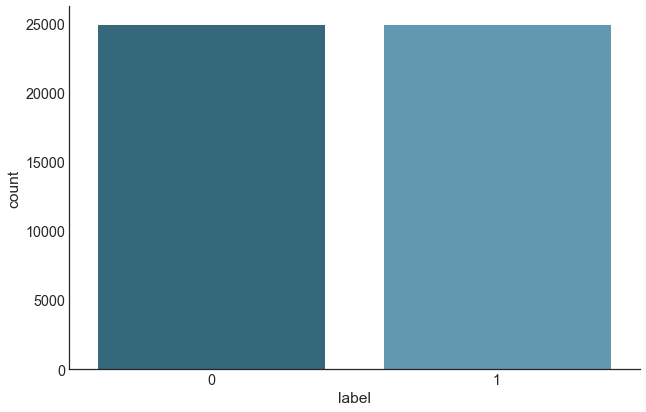

In [86]:
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.style.use(u'seaborn-white')
plt.show();

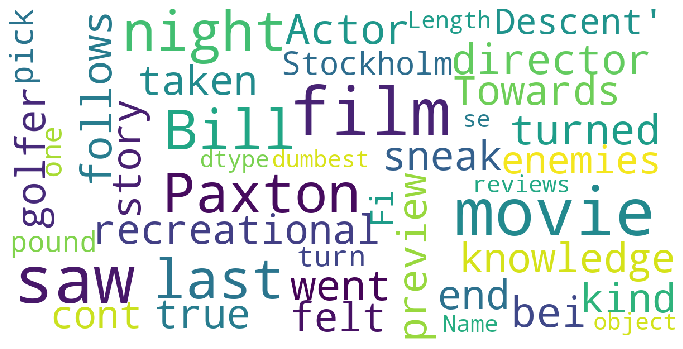

In [87]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews'])


In [88]:
## Generating one row  
rows = df.sample(frac =.75) 
  
## Checking if sample is 0.75 times data or not 
  
if (0.75*(len(df))== len(rows)): 
    print( "Cool") 
    print(len(df), len(rows)) 
  
## Display 
print(rows)

Cool
50000 37500
       label                                            reviews
32953      1  I remember when I was five and my parents thou...
21540      0  I checked out this video expecting to like it....
6249       1  Mr. Carlin left our common forum in June of 20...
20209      0  A really funny story idea with good actors but...
28705      1  Sidney Franklin's "The Good Earth" has achieve...
...      ...                                                ...
31981      1  This is one of those movies that, after watchi...
39806      0  You all know the story of "Hamlet". I do.    W...
26414      1  A year after losing gorgeous Jane Parker (Maur...
35889      1  Ti%s and As*, lots of boobies. Some great char...
42078      0  I rented this horrible movie. The worst think ...

[37500 rows x 2 columns]


In [89]:
rows.shape

(37500, 2)

In [90]:
#rows.to_csv(r'C:\Users/aivii\programsmm\FP736\COMBINED_TEST_TR.csv', index = False)

In [6]:
RawfileName0="C:/Users/aivii/programsmm/FP736/COMBINED_TEST_TR.csv"

In [91]:
## This file has a header. 
## It has "setinment" and "review" on the first row.

## We will create a list of labels and a list of reviews
AllReviewsList=[]
AllLabelsList=[]

with open(RawfileName0,'r', encoding="utf8") as FILE:
    FILE.readline() # skip header line - skip row 1
    ## This reads the line and so does nothing with it
    for row in FILE:
        NextLabel,NextReview=row.split(",", 1)
        #print(Label)
        #print(Review)
        AllReviewsList.append(NextReview)
        AllLabelsList.append(NextLabel)

#print(AllReviewsList)
#print(AllLabelsList) # all the labels 

In [8]:
REPLACE_NO_SPACE = re.compile("()|(%)|(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\*+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

In [92]:
AllReviewList_clean = preprocess_reviews(AllReviewsList)
print(AllReviewList_clean[5])

the movie is not that bad ringo lam sucks i hate when van damme has love in his movies van damme is good only when he doesn't have love in his movies



In [10]:
"""from nltk.corpus import stopwords
print(stopwords.words('english'))"""

"from nltk.corpus import stopwords\nprint(stopwords.words('english'))"

In [11]:
# no point removing them now
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
mine_stop_words = ['in', 'of', 'at', 'a', 'the','movie','film','actor', 'actors']
extend_stop_words = english_stop_words+mine_stop_words 

"""def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in extend_stop_words])
        )
    return removed_stop_words

AllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"""

"def remove_stop_words(corpus):\n    removed_stop_words = []\n    for review in corpus:\n        removed_stop_words.append(\n            ' '.join([word for word in review.split() \n                      if word not in extend_stop_words])\n        )\n    return removed_stop_words\n\nAllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"

In [12]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [13]:
## CountVectorizer
My_CV1=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=100,
                        ngram_range=(1, 4), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=False,
                        token_pattern=r'\b[^\d\W]+\b'
                        )


## CountVectorizer - Bernouli
My_CV1B=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=100,
                        ngram_range=(1, 4), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=True,
                        token_pattern=r'\b[^\d\W]+\b'
                        )



## Tfidf Vectorizer - normalized
My_TF1=TfidfVectorizer(input='content',
                        stop_words=extend_stop_words,
                        max_features=100,
                        #max_features=2000,
                        #min_df=0.2, 
                        
                        #use_idf=True, 
                        #tokenizer=tokenize_and_stem,
                        ngram_range=(1,3)
                        
                        )


## NOw I can vectorize using my list of complete paths to my files
X_CV1=My_CV1.fit_transform(AllReviewList_clean)
X_CV1B=My_CV1B.fit_transform(AllReviewList_clean)
X_TF1=My_TF1.fit_transform(AllReviewList_clean)

print(My_CV1.vocabulary_)
print(My_CV1B.vocabulary_)
print(My_TF1.vocabulary_)


{'little': 41, 'thing': 82, 'seen': 75, 'like': 40, 'work': 95, 'man': 49, 'however': 37, 'us': 89, 'see': 73, 'still': 79, 'would': 97, 'much': 53, 'going': 31, 'world': 96, 'around': 6, 'end': 18, 'well': 94, 'ever': 21, 'make': 47, 'something': 78, 'could': 16, 'watch': 91, 'though': 85, 'people': 62, 'character': 13, 'guy': 35, 'enough': 19, 'give': 29, 'plot': 63, 'makes': 48, 'one': 60, 'acting': 0, 'way': 93, 'bad': 8, 'good': 32, 'nothing': 58, 'better': 10, 'even': 20, 'seems': 74, 'series': 76, 'may': 51, 'time': 87, 'lot': 44, 'funny': 27, 'horror': 36, 'films': 24, 'real': 66, 'take': 81, 'got': 33, 'movies': 52, 'life': 39, 'new': 57, 'made': 46, 'know': 38, 'music': 54, 'never': 56, 'years': 98, 'scene': 71, 'right': 68, 'love': 45, 'say': 70, 'first': 26, 'scenes': 72, 'thought': 86, 'also': 3, 'another': 5, 'young': 99, 'best': 9, 'look': 43, 'show': 77, 'really': 67, 'two': 88, 'things': 83, 'great': 34, 'story': 80, 'must': 55, 'cast': 12, 'characters': 14, 'want': 90

In [14]:
ColNames=My_CV1.get_feature_names()


## OK good - but we want a document topic model A DTM (matrix of counts)
DataFrame_CV=pd.DataFrame(X_CV1.toarray(), columns=ColNames)
DataFrame_CVB=pd.DataFrame(X_CV1B.toarray(), columns=ColNames)
DataFrame_TF=pd.DataFrame(X_TF1.toarray(), columns=ColNames)

# Update row names with file names
MyDict = {}
for i in range(0, len(AllLabelsList)):
    MyDict[i] = AllLabelsList[i]

print("MY DICT", MyDict)

MY DICT {0: '1', 1: '0', 2: '1', 3: '1', 4: '0', 5: '1', 6: '0', 7: '0', 8: '1', 9: '0', 10: '0', 11: '0', 12: '0', 13: '1', 14: '1', 15: '1', 16: '0', 17: '1', 18: '0', 19: '0', 20: '0', 21: '1', 22: '0', 23: '0', 24: '1', 25: '1', 26: '1', 27: '0', 28: '1', 29: '0', 30: '1', 31: '1', 32: '0', 33: '0', 34: '1', 35: '0', 36: '0', 37: '0', 38: '1', 39: '0', 40: '0', 41: '1', 42: '1', 43: '0', 44: '0', 45: '0', 46: '0', 47: '0', 48: '0', 49: '1', 50: '1', 51: '0', 52: '1', 53: '1', 54: '1', 55: '0', 56: '1', 57: '0', 58: '1', 59: '0', 60: '1', 61: '0', 62: '0', 63: '1', 64: '0', 65: '0', 66: '0', 67: '0', 68: '0', 69: '1', 70: '1', 71: '1', 72: '1', 73: '1', 74: '0', 75: '1', 76: '0', 77: '0', 78: '0', 79: '0', 80: '0', 81: '1', 82: '0', 83: '1', 84: '1', 85: '0', 86: '1', 87: '1', 88: '0', 89: '0', 90: '1', 91: '0', 92: '1', 93: '0', 94: '0', 95: '0', 96: '1', 97: '0', 98: '0', 99: '1', 100: '1', 101: '0', 102: '0', 103: '1', 104: '0', 105: '1', 106: '1', 107: '0', 108: '1', 109: '0', 1

In [15]:
DataFrame_CV = DataFrame_CV.rename(MyDict, axis = "index")
DataFrame_CVB = DataFrame_CVB.rename(MyDict, axis = "index")
DataFrame_TF = DataFrame_TF.rename(MyDict, axis = "index")

DataFrame_CV.index.name = 'LABEL'
DataFrame_CVB.index.name = 'LABEL'
DataFrame_TF.index.name = 'LABEL'

## Drop/remove columns not wanted
print(DataFrame_CV.columns)

Index(['acting', 'action', 'actually', 'also', 'always', 'another', 'around',
       'back', 'bad', 'best', 'better', 'big', 'cast', 'character',
       'characters', 'comedy', 'could', 'director', 'end', 'enough', 'even',
       'ever', 'every', 'fact', 'films', 'find', 'first', 'funny', 'get',
       'give', 'go', 'going', 'good', 'got', 'great', 'guy', 'horror',
       'however', 'know', 'life', 'like', 'little', 'long', 'look', 'lot',
       'love', 'made', 'make', 'makes', 'man', 'many', 'may', 'movies', 'much',
       'music', 'must', 'never', 'new', 'nothing', 'old', 'one', 'part',
       'people', 'plot', 'pretty', 'quite', 'real', 'really', 'right', 'saw',
       'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'series', 'show',
       'something', 'still', 'story', 'take', 'thing', 'things', 'think',
       'though', 'thought', 'time', 'two', 'us', 'want', 'watch', 'watching',
       'way', 'well', 'work', 'world', 'would', 'years', 'young'],
      dtype='object')


In [16]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
100


In [17]:
DataFrame_CV.head(5)

,acting,action,actually,also,always,another,around,back,bad,best,...,want,watch,watching,way,well,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,2,1,1,0,0
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,3,0,0,2,1,2,1
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [18]:
DataFrame_CVB.head(5)

,acting,action,actually,also,always,another,around,back,bad,best,...,want,watch,watching,way,well,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,1,0,1,0,0,0,1,...,0,1,0,0,1,0,1,1,1,1
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [19]:
DataFrame_TF.head(5)

,acting,action,actually,also,always,another,around,back,bad,best,...,want,watch,watching,way,well,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.177158,0.0,0.000000,0.000000,...,0.0,0.143766,0.0,0.000000,0.126756,0.338555,0.181441,0.121139,0.000000,0.000000
0,0.19836,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.190358,0.000000,...,0.0,0.000000,0.0,0.189715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.106400,0.000000,...,0.0,0.109738,0.0,0.106041,0.000000,0.000000,0.000000,0.092466,0.000000,0.000000
1,0.00000,0.0,0.0,0.06794,0.0,0.084673,0.000000,0.0,0.000000,0.075818,...,0.0,0.000000,0.0,0.209774,0.000000,0.000000,0.182651,0.060973,0.169238,0.093013
0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.194699,0.000000,...,0.0,0.200806,0.0,0.000000,0.177047,0.000000,0.253429,0.000000,0.000000,0.000000


In [20]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)

In [ ]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which"]
for nextcol in DataFrame_CV.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CV.drop([nextcol], axis=1)
        #DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [22]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which"]
for nextcol in DataFrame_CVB.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [23]:
print(DataFrame_CV.columns)

Index(['acting', 'action', 'actually', 'always', 'another', 'around', 'back',
       'best', 'better', 'cast', 'character', 'characters', 'comedy', 'could',
       'director', 'enough', 'even', 'ever', 'every', 'fact', 'films', 'find',
       'first', 'funny', 'give', 'going', 'good', 'great', 'horror', 'however',
       'know', 'life', 'like', 'little', 'long', 'look', 'love', 'made',
       'make', 'makes', 'many', 'movies', 'much', 'music', 'must', 'never',
       'nothing', 'part', 'people', 'plot', 'pretty', 'quite', 'real',
       'really', 'right', 'scene', 'scenes', 'seems', 'seen', 'series', 'show',
       'something', 'still', 'story', 'take', 'thing', 'things', 'think',
       'though', 'thought', 'time', 'want', 'watch', 'watching', 'well',
       'work', 'world', 'would', 'years', 'young'],
      dtype='object')


In [24]:
DataFrame_CV.head(5)

,acting,action,actually,always,another,around,back,best,better,cast,...,time,want,watch,watching,well,work,world,would,years,young
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,2,1,1,0,0
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,2,1,2,1
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [25]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
80


In [26]:
print("\nNumber of columns:")
print(len(DataFrame_CVB.columns))


Number of columns:
80


In [27]:
print("\nNumber of columns:")
print(len(DataFrame_TF.columns))


Number of columns:
80


In [28]:
DataFrame_CV1 = DataFrame_CV.reset_index()
#DataFrame_CV1B = DataFrame_CVB.reset_index()
#DataFrame_TF1 = DataFrame_TF.reset_index()

In [29]:
DataFrame_CV1.head()
#DataFrame_CV1B
#DataFrame_TF1

,LABEL,acting,action,actually,always,another,around,back,best,better,...,time,want,watch,watching,well,work,world,would,years,young
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,2,1,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,2,1,2,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [30]:
DataFrame_CV1B = DataFrame_CVB.reset_index()
DataFrame_TF1 = DataFrame_TF.reset_index()

In [31]:
print("\nNumber of columns:")
print(len(DataFrame_CV1.columns))


Number of columns:
81


In [32]:
print("\nNumber of columns:")
print(len(DataFrame_CV1B.columns))


Number of columns:
81


In [33]:
print("\nNumber of columns:")
print(len(DataFrame_TF1.columns))


Number of columns:
81


### __k-means__

In [34]:
# Convert DataFrame to matrix
MyMatrixClean = DataFrame_TF1.values
## Check it
print(type(MyMatrixClean))
print(MyMatrixClean)

# Using sklearn
## you will need
from sklearn.cluster import KMeans
import numpy as np
kmeans_object2 = sklearn.cluster.KMeans(n_clusters=3)
#print(kmeans_object)


<class 'numpy.ndarray'>
[['1' 0.0 0.0 ... 0.12113860484827667 0.0 0.0]
 ['0' 0.19835956620529305 0.0 ... 0.0 0.0 0.0]
 ['1' 0.0 0.0 ... 0.09246568968412167 0.0 0.0]
 ...
 ['1' 0.0 0.0 ... 0.0 0.0 0.0]
 ['1' 0.0 0.0 ... 0.0927306512143599 0.0 0.14145800702785014]
 ['0' 0.0 0.0 ... 0.2249388770141019 0.0 0.0]]


In [35]:
kmeans_object2.fit(MyMatrixClean)
# Get cluster assignment labels
labels2 = kmeans_object2.labels_
print("k-means with k = 3\n", labels2)
# Format results as a DataFrame
Myresults2 = pd.DataFrame([DataFrame_TF1.index,labels2]).T
print("k means RESULTS\n", Myresults2)

k-means with k = 3
 [1 2 1 ... 1 1 2]
k means RESULTS
            0  1
0          0  1
1          1  2
2          2  1
3          3  1
4          4  2
...      ... ..
37495  37495  2
37496  37496  1
37497  37497  1
37498  37498  1
37499  37499  2

[37500 rows x 2 columns]


##### Test Train split

In [36]:
## Train, Test split - Count Vectorizer 
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF, TestDF = train_test_split(DataFrame_CV1, test_size=0.3)

## Now we have a training set and a testing set. 
print("\nThe training set is:")
print(TrainDF)
print("\nThe testing set is:")
print(TestDF)


The training set is:
      LABEL  acting  action  actually  always  another  around  back  best  \
19564     1       0       0         0       0        0       0     0     0   
34320     0       0       0         0       0        1       0     1     0   
5337      0       0       0         0       0        0       0     0     0   
21255     1       0       0         0       0        0       1     0     0   
28272     1       1       4         0       0        0       0     0     1   
...     ...     ...     ...       ...     ...      ...     ...   ...   ...   
17272     0       1       0         1       0        0       0     2     0   
24803     1       0       0         0       0        0       0     2     0   
33477     1       0       0         0       0        0       0     2     0   
35665     1       0       0         0       0        0       0     0     0   
1478      0       0       0         0       1        0       0     0     0   

       better  ...  time  want  watch  wa

In [37]:
## Train, Test split - Count Vectorizer - Bernoulli
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDFB, TestDFB = train_test_split(DataFrame_CV1B, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDFB)
#print("\nThe testing set is:")
#print(TestDFB)

In [38]:
## Train, Test split -TF
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF_tf, TestDF_tf = train_test_split(DataFrame_TF1, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDF_tf)
#print("\nThe testing set is:")
#print(TestDF_tf)

In [39]:
## Save labels
TestLabels=TestDF["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF=TestDF.copy()
TestDF = TestDF.drop(["LABEL"], axis=1)
print(TestDF)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels=TrainDF.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels=TrainDF["LABEL"]
#print(TrainLabels)

       acting  action  actually  always  another  around  back  best  better  \
5771        0       0         0       0        0       0     1     0       0   
14464       1       0         0       0        0       0     0     0       0   
7142        1       0         1       0        0       0     0     0       1   
10159       0       0         0       0        0       0     0     0       0   
5474        0       0         0       1        0       0     0     0       0   
...       ...     ...       ...     ...      ...     ...   ...   ...     ...   
24572       1       0         0       0        1       0     0     0       0   
26113       1       0         0       0        0       0     1     0       0   
20828       1       0         0       1        0       0     0     1       0   
13229       0       0         0       0        0       0     1     0       0   
18259       0       0         1       0        0       0     0     0       0   

       cast  ...  time  want  watch  wa

In [40]:
## Save labels -  Bernoulli
TestLabelsB=TestDFB["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDFB=TestDFB.copy()
TestDFB = TestDFB.drop(["LABEL"], axis=1)
print(TestDFB)

## DF seperate TRAIN SET from the labels
TrainDFB_nolabels=TrainDFB.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabelsB=TrainDFB["LABEL"]
#print(TrainLabels)

       acting  action  actually  always  another  around  back  best  better  \
14015       0       0         0       0        0       0     0     0       0   
24867       0       0         0       0        0       0     0     1       0   
9443        0       1         0       0        0       0     0     0       0   
24199       0       0         0       1        0       0     1     0       0   
39          0       0         1       0        0       0     0     0       1   
...       ...     ...       ...     ...      ...     ...   ...   ...     ...   
21068       0       0         1       0        0       0     0     1       0   
1058        0       0         0       0        0       1     1     1       0   
4645        1       0         0       0        0       0     0     1       0   
8320        1       0         0       0        0       0     0     0       0   
11679       0       1         0       0        0       1     0     0       0   

       cast  ...  time  want  watch  wa

In [61]:
## Save labels - TF
TestLabels_tf=TestDF_tf["LABEL"]
print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF_tf=TestDF_tf.copy()
TestDF_tf = TestDF_tf.drop(["LABEL"], axis=1)
print(TestDF_tf)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels_tf=TrainDF_tf.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels_tf=TrainDF_tf["LABEL"]
#print(TrainLabels)

KeyError: 'LABEL'

## __MNB__

#### __- CountVect__

In [42]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()

MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels)


The prediction from NB is:
['0' '1' '0' ... '1' '1' '1']

The actual labels are:
5771     1
14464    1
7142     0
10159    1
5474     1
        ..
24572    0
26113    0
20828    0
13229    1
18259    0
Name: LABEL, Length: 11250, dtype: object


In [43]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[4091 1623]
 [1660 3876]]


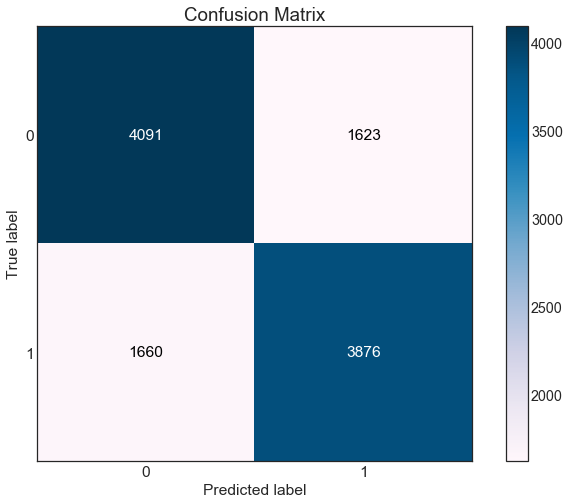

In [44]:
skplt.metrics.plot_confusion_matrix(TestLabels, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [45]:
print(np.round(MyModelNB.predict_proba(TestDF),2))

[[0.51 0.49]
 [0.17 0.83]
 [0.83 0.17]
 ...
 [0.34 0.66]
 [0.02 0.98]
 [0.1  0.9 ]]


In [46]:
from sklearn import metrics

print(metrics.classification_report(TestLabels, Prediction))
print(metrics.confusion_matrix(TestLabels, Prediction))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5714
           1       0.70      0.70      0.70      5536

    accuracy                           0.71     11250
   macro avg       0.71      0.71      0.71     11250
weighted avg       0.71      0.71      0.71     11250

[[4091 1623]
 [1660 3876]]


In [47]:
import pickle
# save the model to disk
filename = 'MNB_model.sav'
pickle.dump(MyModelNB, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(TestLabels, TestDF)
#print(result)

In [48]:
#word_freq = dict(zip(My_CV1.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
#word_counter = collections.Counter(word_freq)
#word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
#fig, ax = plt.subplots(figsize=(12, 10))
#sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
#plt.show();

In [49]:
def rev_important_features(vectorizer,classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names), reverse = True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names), reverse = True)[:n]
    print("Important words in negative reviews: ")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews: ")
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)


In [50]:
rev_important_features(My_CV1,MyModelNB, 20)

Important words in negative reviews: 
0 11684.0 good
0 7998.0 could
0 7695.0 first
0 7246.0 show
0 6438.0 much
0 6415.0 say
0 5331.0 plot
0 5233.0 long
0 4896.0 character
0 4894.0 makes
0 4893.0 know
0 4582.0 however
0 4447.0 every
0 4381.0 seems
0 4320.0 little
0 4224.0 man
0 4165.0 acting
0 3813.0 big
0 3777.0 really
0 3685.0 scenes
-----------------------------------------
Important words in positive reviews: 
1 9387.0 good
1 7793.0 first
1 6925.0 plot
1 6791.0 funny
1 6729.0 say
1 6573.0 seems
1 5660.0 show
1 5624.0 much
1 5205.0 could
1 4861.0 every
1 4814.0 long
1 4651.0 makes
1 4472.0 horror
1 4459.0 back
1 4196.0 going
1 4028.0 even
1 3980.0 like
1 3848.0 however
1 3771.0 big
1 3763.0 really


In [51]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), MyModelNB.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('good', -3.273702070006607)
('first', -3.4597801410788662)
('plot', -3.577851902015155)
('funny', -3.5973888989863383)
('say', -3.6065592043387475)
('seems', -3.6300118727533572)
('show', -3.779533792940862)
('much', -3.785913399904901)
('could', -3.8633225414230115)
('every', -3.931684472101452)
('long', -3.941398302745295)
('makes', -3.975837113338967)
('horror', -4.015075023544673)
('back', -4.017985581963412)
('going', -4.078764363643931)
('even', -4.1196161417861745)
('like', -4.131601303977204)
('however', -4.165320973693776)
('big', -4.185528983224174)
('really', -4.187652126272251)



('made', -5.244635094960377)
('comedy', -5.0957406690219464)
('many', -5.06716729657789)
('films', -5.057610040014483)
('get', -5.022103351557573)
('enough', -4.998515925990698)
('scene', -4.994935969899981)
('new', -4.993150786444628)
('saw', -4.976640977480816)
('another', -4.947252518481315)
('action', -4.942154801409647)
('quite', -4.93595934368786)
('music', -4.935398018946767)
('actually', 

In [52]:
def predict_category(s, train=TestLabels, model=MyModelNB):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### __BNB__

In [53]:
BernModel = BernoulliNB()
BernModel.fit(TrainDFB_nolabels, TrainLabelsB)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
PredictionB = BernModel.predict(TestDFB)
print("\nBernoulli prediction:\n", BernModel.predict(TestDFB))
print("\nActual:")
print(TestLabelsB)


Bernoulli prediction:
 ['0' '0' '0' ... '1' '0' '1']

Actual:
14015    0
24867    1
9443     0
24199    1
39       0
        ..
21068    1
1058     1
4645     1
8320     0
11679    0
Name: LABEL, Length: 11250, dtype: object


In [54]:
bn_matrix = confusion_matrix(TestLabelsB, BernModel.predict(TestDFB))
print("\nThe confusion  matrix is:")
print(bn_matrix)


The confusion  matrix is:
[[3700 1878]
 [1658 4014]]


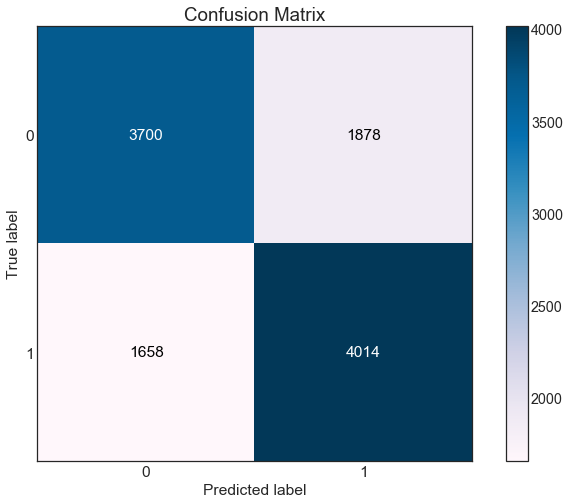

In [55]:
skplt.metrics.plot_confusion_matrix(TestLabelsB, PredictionB,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [56]:
print(np.round(BernModel.predict_proba(TestDF),2))


[[0.24 0.76]
 [0.53 0.47]
 [0.68 0.32]
 ...
 [0.2  0.8 ]
 [0.59 0.41]
 [0.36 0.64]]


In [57]:
print(metrics.classification_report(TestLabels, PredictionB))
print(metrics.confusion_matrix(TestLabels, PredictionB))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      5714
           1       0.49      0.52      0.50      5536

    accuracy                           0.50     11250
   macro avg       0.50      0.50      0.50     11250
weighted avg       0.50      0.50      0.50     11250

[[2705 3009]
 [2653 2883]]


In [58]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), BernModel.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('made', -0.5687661409643514)
('going', -0.8698019641235213)
('first', -0.9887021018145283)
('must', -1.0784233302993673)
('really', -1.0836017725818898)
('funny', -1.0885802847883195)
('see', -1.098841462497461)
('one', -1.1381080167197641)
('show', -1.2467848450276335)
('may', -1.2628580547074577)
('could', -1.2930138485075524)
('little', -1.3321788994193007)
('every', -1.3344970691042057)
('back', -1.405107560554418)
('scenes', -1.4480462602990283)
('horror', -1.4841130313337993)
('go', -1.5441692500318709)
('pretty', -1.5732094032530348)
('however', -1.5865577660764618)
('big', -1.5993302913286707)



('give', -2.59322499309056)
('love', -2.4757824988983907)
('comedy', -2.3416836015767233)
('makes', -2.3377200609142674)
('never', -2.3019742194258734)
('actually', -2.2499178574698204)
('enough', -2.234101568026535)
('seems', -2.228411652248856)
('real', -2.22064050752397)
('cast', -2.2192340375312183)
('movies', -2.215726492721541)
('films', -2.211533614461505)
('action', -2.1874194

### __MNB__

##### __-TFIDF__

In [62]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB1= MultinomialNB()

MyModelNB.fit(TrainDF_nolabels_tf, TrainLabels_tf)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels_tf)


The prediction from NB is:
['0' '1' '0' ... '1' '1' '1']

The actual labels are:
17454    0
19177    0
20275    1
11889    0
31305    1
        ..
23276    0
21322    1
13330    0
710      1
24270    0
Name: LABEL, Length: 11250, dtype: object


In [63]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels_tf, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[3008 2667]
 [3004 2571]]


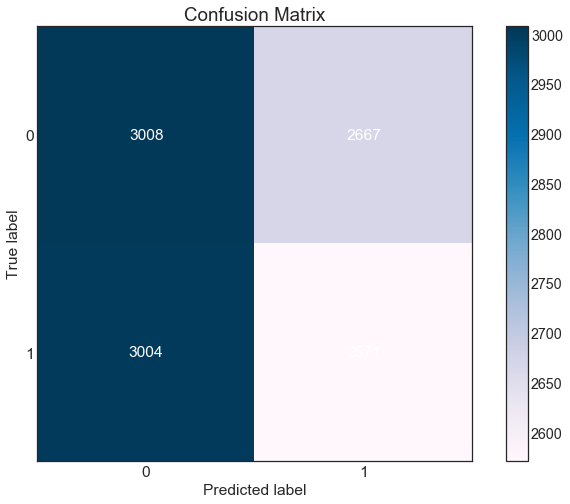

In [64]:
skplt.metrics.plot_confusion_matrix(TestLabels_tf, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [65]:
print(np.round(MyModelNB.predict_proba(TestDF_tf),2))

[[0.63 0.37]
 [0.58 0.42]
 [0.67 0.33]
 ...
 [0.52 0.48]
 [0.6  0.4 ]
 [0.55 0.45]]


In [66]:
from sklearn import metrics

print(metrics.classification_report(TestLabels_tf, Prediction))
print(metrics.confusion_matrix(TestLabels_tf, Prediction))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      5675
           1       0.49      0.46      0.48      5575

    accuracy                           0.50     11250
   macro avg       0.50      0.50      0.50     11250
weighted avg       0.50      0.50      0.50     11250

[[3008 2667]
 [3004 2571]]


### __SVM__

__- CountVect__

In [67]:
from sklearn.svm import LinearSVC

SVM_Model1=LinearSVC(C=0.01, multi_class="crammer_singer")
SVM_Model1.fit(TrainDF_nolabels, TrainLabels)

C:\Users\aivii\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [68]:
print("SVM prediction:\n", SVM_Model1.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM prediction:
 ['0' '1' '0' ... '1' '1' '1']
Actual:
5771     1
14464    1
7142     0
10159    1
5474     1
        ..
24572    0
26113    0
20828    0
13229    1
18259    0
Name: LABEL, Length: 11250, dtype: object


In [69]:
SVM_matrix = confusion_matrix(TestLabels, SVM_Model1.predict(TestDF))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")


The confusion matrix is:
[[4077 1637]
 [1590 3946]]





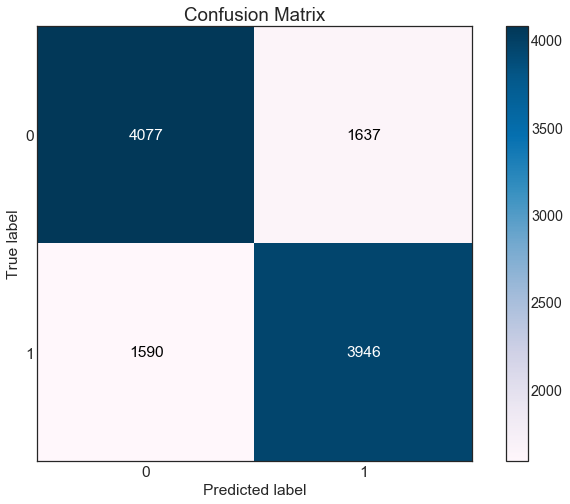

In [70]:
skplt.metrics.plot_confusion_matrix(TestLabels, SVM_Model1.predict(TestDF),normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [71]:
print(metrics.classification_report(TestLabels, SVM_Model1.predict(TestDF)))
print(metrics.confusion_matrix(TestLabels, SVM_Model1.predict(TestDF)))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      5714
           1       0.71      0.71      0.71      5536

    accuracy                           0.71     11250
   macro avg       0.71      0.71      0.71     11250
weighted avg       0.71      0.71      0.71     11250

[[4077 1637]
 [1590 3946]]


In [109]:
"""feature_ranks = sorted(zip(SVM_Model1.coef_[0], My_CV1.get_feature_names()))

## get the 10 features that are best indicators of very positivesentiment (they are at the bottom of the ranked list)
very_positive_10 = feature_ranks[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

## get 10 features that are least relevant to "very positive" sentiment (they are at the top of the ranked list)
not_very_positive_10 = feature_ranks[:10]
print("not very positive words")
for i in range(0, len(not_very_positive_10)):
    print(not_very_positive_10[i])
print()"""


'feature_ranks = sorted(zip(SVM_Model1.coef_[0], My_CV1.get_feature_names()))\n\n## get the 10 features that are best indicators of very positivesentiment (they are at the bottom of the ranked list)\nvery_positive_10 = feature_ranks[-10:]\nprint("Very positive words")\nfor i in range(0, len(very_positive_10)):\n    print(very_positive_10[i])\nprint()\n\n## get 10 features that are least relevant to "very positive" sentiment (they are at the top of the ranked list)\nnot_very_positive_10 = feature_ranks[:10]\nprint("not very positive words")\nfor i in range(0, len(not_very_positive_10)):\n    print(not_very_positive_10[i])\nprint()'

Another SVM

In [93]:
y=TrainLabels.copy()
X=TrainDF_nolabels.copy()

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [95]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.01)
model.fit(X, y)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [102]:
#plot_svc_decision_function(model)